### Aug 11, 13:  Calculus and the Complex Plane

We have many versions of high school math, this "mixed with programming" approach being one of them.  

Or rather, "mixing with programming" is a possibility many pathways through this space have and/or will incorporate.

Most versions of high school math include some amount of Delta Calculus, which first takes root in Newton's introduction of "fluxions" to the language (his *Method of Fluxions* was completed in 1671, and published in 1736).

In Python world, we would conventionally use [Sage](https://www.sagemath.org/) in the cloud, or get by with a less ambitious set of local modules, such as we find through the Anaconda distribution.

In this curriculum, we take the latter approach, using a combination of Standard Library modules, numpy, pandas and [sympy](CAS_Python.ipynb).

In [1]:
# from Standard Library

import math
import cmath

#### Differentiation

The cell below encapsulates an approximation of what it means to "take the derivative of f".  

The D function properly expects a function as input, and returns a corresponding function as output.

What the output function does is "wiggle x" just a tiny bit to get a read on the resulting change.  

Change at x, per wiggle (x+h), is what the new function, the derivative function, computes. 

h is miniscule, here 0.00000001.  That's what makes our implementation of D "approximate": h is not truly infinitessimal.  "It's close enough for folk music" we sometimes say.

In [2]:
def D(f, h=1e-8):
    def d(x):
        return (f(x+h)-f(x))/h
    return d

Lets take the 2nd power function, which plots as a parabola, as in ["parabolic dish"](https://duckduckgo.com/?q=parabolic+dish&atb=v250-5__&iax=images&ia=images), a device for reflecting incoming "invisible light" (such as TV programs) from satellites, to a common "focus" held in front of the dish.

In [3]:
def pow2(x):
    return x * x

Now lets run ```pow2``` through our D function, to get back another function.  This now function will talk about "how much wiggle" at each x.  See below.

In [4]:
diff_pow2 = D(pow2)

In [5]:
# 3rd party workhorses

import numpy as np
import pandas as pd

In [6]:
domain = np.linspace(-3, 3, 200)

In [7]:
table = pd.DataFrame(
           {'x'   : domain, 
            'pow2': [pow2(x) for x in domain], 
            'diff': [diff_pow2(x) for x in domain]})

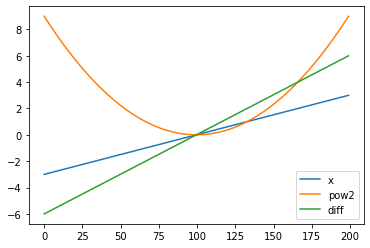

In [8]:
table.plot();

What does the above plot reveal?

In orange, we see the original parabola.  The horizontal axis enumerates our points so just remember they range from -3 to 3.  Of course you're free to alter these values as you interact with your Notebook.

In blue, we see x, and its values on the vertical axis.  It ranges from -3 to 3.  It slopes up to the right.

The green line traces the "wiggle" which corresponds to the "slope" or "steepness" of the original orange curve.  The orange curve starts steeply down, levels off, and goes more steeply up.  The slope starts negative (steeply down), passes through zero (levels off), and climbs steadily (steeply up).

The green line is straight and itself has a slope of 2.  The derivative of a parabola is a line, showing slope going from negative to positive at this steady rate of of increase.

Lets use our new tool, D, to investigate the function $y = e^{x}$.  What's so special about it?

In [9]:
def e(x):
    return math.e ** x

In [10]:
diff_ex = D(e)

In [11]:
table = pd.DataFrame(
           {'x'   : domain, 
            'ex': [e(x) for x in domain], 
            'diff_ex': [diff_ex(x) for x in domain]})

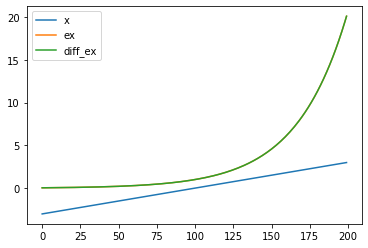

In [12]:
table.plot();

What to observe is we do not see the orange line, because the green line has covered it exactly.  The $e^{x}$ function graphs its own slope one could say.  It starts almost zero (perfectly flat) and then by x=0, it has grown to 1, at the steepness increases ever more steeply after that.

In [13]:
table = pd.DataFrame(
           {'x'   : domain, 
            'ex': [e(x) for x in domain]})

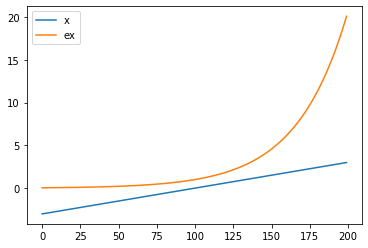

In [14]:
table.plot();

### Complex Numbers

Complex numbers give us a concise way of plotting points on a plane, using a pair of crossed axes.  We call one axis real, and one imaginary.  Python has complex numbers built in.

In [15]:
one = complex(1, 0)

In [16]:
# help(one)

In [17]:
import cmath

In [18]:
print(dir(cmath))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atanh', 'cos', 'cosh', 'e', 'exp', 'inf', 'infj', 'isclose', 'isfinite', 'isinf', 'isnan', 'log', 'log10', 'nan', 'nanj', 'phase', 'pi', 'polar', 'rect', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau']


In high school math, we plot points (x, y) on a Cartesian plane with crossed axes.  Both axes represent the "real numbers".

Then, using those new skills, we swap out one of the real axes, for an imaginary axis, meaning it's now in units of 2nd root of -1.

In [19]:
cmath.sqrt(-1)

1j

In [20]:
(2 + 2j) * (1 + 3j)

(-4+8j)

In [21]:
cmath.polar(one)

(1.0, 0.0)

Picture an arrow, like a clock hand, pointing to (1, 1) on a Cartesian plane, except the vertical axis is in units of 1j.  

In Python, we use a + bj to express complex numbers, where any int or floating point may be used in place of a, b.

In [22]:
one_one = complex(1, 1)

In [23]:
r, theta = cmath.polar(one_one)
r, theta

(1.4142135623730951, 0.7853981633974483)

In [24]:
from math import degrees, radians

In [25]:
radians(90)

1.5707963267948966

In [26]:
degrees(cmath.pi)

180.0

In [27]:
degrees(theta)

45.0

With this introduction, we're ready to tie everything together using [Euler's Formula](Trig.ipynb).